<a href="https://colab.research.google.com/github/Hoirotunnisa/Menentukan-Kombinasi-Fitur-Media-Sosial-yang-Paling-Banyak-Disukai-Mahasiswa-Analisis-TURF/blob/main/Manova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analisis MANOVA atas Pengaruh Mendengarkan Musik terhadap Fokus dan Produktivitas Mahasiswa dalam Mengerjakan Tugas**
- **Nama        :** Hoirotun Nisa'
- **Kelas       :** Matematika 6B
- **NIM         :** 11220940000003

In [3]:
pip install pingouin

In [ ]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA
import pingouin as pg

In [ ]:
# Baca file Excel
df = pd.read_excel("/content/data_responden_musik_fokus_produktivitas.xlsx")


In [ ]:
# Ubah nama kolom agar konsisten
df.rename(columns={
    "Preferred_Genre": "Genre",
    "Prompt_Submission": "Prompt",
    "Study_Session": "Study",
    "Academic_Task": "Task",
    "Concentration": "Concentration"
}, inplace=True)

In [ ]:
# MANOVA
maov = MANOVA.from_formula('Prompt + Study + Task + Concentration ~ Genre', data=df)
print(maov.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.1268 4.0000 161.0000 277.2475 0.0000
         Pillai's trace 0.8732 4.0000 161.0000 277.2475 0.0000
 Hotelling-Lawley trace 6.8881 4.0000 161.0000 277.2475 0.0000
    Roy's greatest root 6.8881 4.0000 161.0000 277.2475 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         Genre          Value   Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.8643 16.0000 492.5008  1.5045 0.0932
         Pillai's trace 0.1407 16.0000 656.0000  1.4946 0.0954
 Hotelling-

Hasil analisis MANOVA menunjukkan bahwa sebagian besar statistik multivariat, seperti Wilks’ Lambda (p = 0,0932), Pillai’s Trace (p = 0,0954), dan Hotelling-Lawley Trace (p = 0,0934), tidak signifikan karena nilai p-nya lebih besar dari 0,05. Namun, Roy’s Greatest Root menunjukkan hasil yang signifikan dengan p = 0,0032. Hal ini mengindikasikan bahwa terdapat perbedaan signifikan antara genre musik terhadap paling tidak salah satu dari variabel fokus dan produktivitas. Dengan demikian, meskipun secara umum efeknya tidak terlalu kuat, hasil ini tetap memberikan dasar untuk melanjutkan ke analisis post-hoc guna mengetahui variabel dan pasangan genre yang memiliki perbedaan signifikan.

In [ ]:
# Post-hoc Tukey untuk masing-masing variabel
print("\n=== Tukey Post-hoc: Prompt Submission ===")
print(pg.pairwise_tukey(data=df, dv='Prompt', between='Genre'))



=== Tukey Post-hoc: Prompt Submission ===
                A               B   mean(A)   mean(B)      diff        se  \
0         Country    Instrumental  3.923077  3.904762  0.018315  0.278632   
1         Country             Pop  3.923077  3.929412 -0.006335  0.261443   
2         Country  Rhythm’n’blues  3.923077  3.000000  0.923077  0.359652   
3         Country            Rock  3.923077  3.611111  0.311966  0.319535   
4    Instrumental             Pop  3.904762  3.929412 -0.024650  0.165582   
5    Instrumental  Rhythm’n’blues  3.904762  3.000000  0.904762  0.297346   
6    Instrumental            Rock  3.904762  3.611111  0.293651  0.247320   
7             Pop  Rhythm’n’blues  3.929412  3.000000  0.929412  0.281304   
8             Pop            Rock  3.929412  3.611111  0.318301  0.227781   
9  Rhythm’n’blues            Rock  3.000000  3.611111 -0.611111  0.335979   

          T   p-tukey    hedges  
0  0.065732  0.999996  0.020643  
1 -0.024230  1.000000 -0.007552  
2  2.56

Hasil uji Tukey Post-hoc menunjukkan bahwa Prompt Submission mahasiswa berbeda signifikan antar beberapa genre musik. Mahasiswa yang mendengarkan musik Pop, Country, dan Instrumental memiliki skor Prompt Submission lebih tinggi dibandingkan mereka yang mendengarkan Rhythm’n’blues. Perbedaan signifikan terjadi pada pasangan Country vs Rhythm’n’blues, Pop vs Rhythm’n’blues, dan Instrumental vs Rock (p < 0,05). Ini menunjukkan bahwa genre musik tertentu dapat memengaruhi ketepatan mahasiswa dalam menyelesaikan tugas.

In [ ]:
print("\n=== Tukey Post-hoc: Study Session ===")
print(pg.pairwise_tukey(data=df, dv='Study', between='Genre'))


=== Tukey Post-hoc: Study Session ===
                A               B   mean(A)   mean(B)      diff        se  \
0         Country    Instrumental  2.769231  2.928571 -0.159341  0.266367   
1         Country             Pop  2.769231  3.152941 -0.383710  0.249935   
2         Country  Rhythm’n’blues  2.769231  3.090909 -0.321678  0.343822   
3         Country            Rock  2.769231  3.166667 -0.397436  0.305470   
4    Instrumental             Pop  2.928571  3.152941 -0.224370  0.158294   
5    Instrumental  Rhythm’n’blues  2.928571  3.090909 -0.162338  0.284258   
6    Instrumental            Rock  2.928571  3.166667 -0.238095  0.236434   
7             Pop  Rhythm’n’blues  3.152941  3.090909  0.062032  0.268922   
8             Pop            Rock  3.152941  3.166667 -0.013725  0.217755   
9  Rhythm’n’blues            Rock  3.090909  3.166667 -0.075758  0.321190   

          T   p-tukey    hedges  
0 -0.598199  0.975190 -0.187757  
1 -1.535238  0.541161 -0.448019  
2 -0.935596

Hasil uji Tukey Post-hoc pada variabel Study Session menunjukkan tidak ada perbedaan yang signifikan antar genre musik, karena seluruh nilai p-tukey > 0,05. Ini berarti genre musik yang didengarkan tidak berpengaruh secara signifikan terhadap sesi belajar mahasiswa.

In [ ]:
print("\n=== Tukey Post-hoc: Academic Task ===")
print(pg.pairwise_tukey(data=df, dv='Task', between='Genre'))


=== Tukey Post-hoc: Academic Task ===
                A               B   mean(A)   mean(B)      diff        se  \
0         Country    Instrumental  4.230769  4.166667  0.064103  0.273379   
1         Country             Pop  4.230769  4.082353  0.148416  0.256514   
2         Country  Rhythm’n’blues  4.230769  4.000000  0.230769  0.352872   
3         Country            Rock  4.230769  3.777778  0.452991  0.313511   
4    Instrumental             Pop  4.166667  4.082353  0.084314  0.162460   
5    Instrumental  Rhythm’n’blues  4.166667  4.000000  0.166667  0.291741   
6    Instrumental            Rock  4.166667  3.777778  0.388889  0.242658   
7             Pop  Rhythm’n’blues  4.082353  4.000000  0.082353  0.276000   
8             Pop            Rock  4.082353  3.777778  0.304575  0.223487   
9  Rhythm’n’blues            Rock  4.000000  3.777778  0.222222  0.329645   

          T   p-tukey    hedges  
0  0.234483  0.999325  0.074490  
1  0.578588  0.978053  0.169177  
2  0.653974

Hasil uji Tukey Post-hoc pada variabel Academic Task menunjukkan tidak ada perbedaan signifikan antar genre musik (p > 0,05). Artinya, jenis musik yang didengarkan tidak berpengaruh secara signifikan terhadap kemampuan mahasiswa dalam menyelesaikan tugas akademik.

In [ ]:
print("\n=== Tukey Post-hoc: Concentration ===")
print(pg.pairwise_tukey(data=df, dv='Concentration', between='Genre'))


=== Tukey Post-hoc: Concentration ===
                A               B   mean(A)   mean(B)      diff        se  \
0         Country    Instrumental  2.923077  3.238095 -0.315018  0.256130   
1         Country             Pop  2.923077  3.070588 -0.147511  0.240329   
2         Country  Rhythm’n’blues  2.923077  2.909091  0.013986  0.330607   
3         Country            Rock  2.923077  2.888889  0.034188  0.293730   
4    Instrumental             Pop  3.238095  3.070588  0.167507  0.152210   
5    Instrumental  Rhythm’n’blues  3.238095  2.909091  0.329004  0.273333   
6    Instrumental            Rock  3.238095  2.888889  0.349206  0.227347   
7             Pop  Rhythm’n’blues  3.070588  2.909091  0.161497  0.258586   
8             Pop            Rock  3.070588  2.888889  0.181699  0.209386   
9  Rhythm’n’blues            Rock  2.909091  2.888889  0.020202  0.308845   

          T   p-tukey    hedges  
0 -1.229917  0.733937 -0.423167  
1 -0.613788  0.972741 -0.175848  
2  0.042304

Hasil uji Tukey Post-hoc pada variabel Concentration menunjukkan tidak ada perbedaan signifikan antar genre musik (p > 0,05), sehingga dapat disimpulkan bahwa genre musik tidak berpengaruh secara signifikan terhadap konsentrasi mahasiswa.

In [ ]:
!pip install seaborn


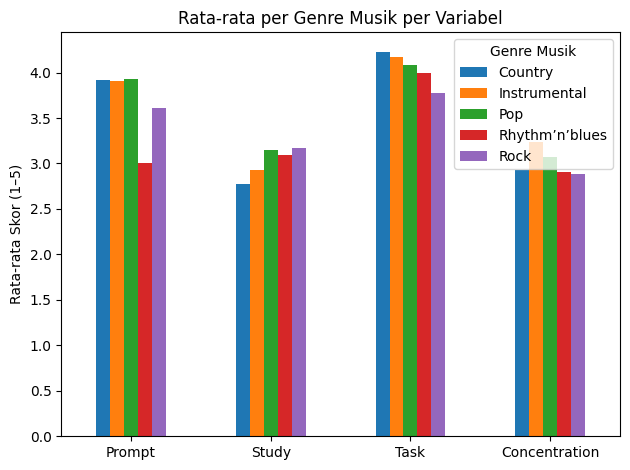

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data
df = pd.read_excel("data_responden_musik_fokus_produktivitas.xlsx")

# Rename kolom agar konsisten
df.rename(columns={
    "Preferred_Genre": "Genre",
    "Prompt_Submission": "Prompt",
    "Study_Session": "Study",
    "Academic_Task": "Task",
    "Concentration": "Concentration"
}, inplace=True)

# Visualisasi: rata-rata per genre per variabel
df.groupby('Genre')[['Prompt', 'Study', 'Task', 'Concentration']].mean().T.plot(kind='bar')

# Judul dan label
plt.title('Rata-rata per Genre Musik per Variabel')
plt.ylabel('Rata-rata Skor (1–5)')
plt.xticks(rotation=0)
plt.legend(title='Genre Musik')
plt.tight_layout()
plt.show()


Berdasarkan grafik rata-rata per genre musik terhadap variabel fokus dan produktivitas, terlihat bahwa jenis musik yang didengarkan mahasiswa memberikan pengaruh yang berbeda pada setiap aspek. Genre Pop, Instrumental, dan Country menunjukkan rata-rata skor yang lebih tinggi terutama pada variabel Prompt Submission dan Academic Task, sedangkan Rhythm’n’blues dan Rock cenderung lebih rendah. Pada variabel Study Session, perbedaan antar genre relatif kecil, menunjukkan bahwa durasi atau kualitas sesi belajar tidak terlalu dipengaruhi oleh genre musik. Untuk variabel Concentration, genre Instrumental tampak paling mendukung, sementara Rock dan Rhythm’n’blues kembali menjadi genre dengan skor terendah.

Insight:

- Pop dan Instrumental: Konsisten menghasilkan skor tinggi pada Prompt Submission, Academic Task, dan Concentration.

- Instrumental: Paling efektif untuk meningkatkan konsentrasi saat belajar.

-  Rhythm’n’blues dan Rock: Kurang mendukung dalam hal ketepatan waktu dan fokus.

- Study Session: Cenderung tidak dipengaruhi secara signifikan oleh genre musik.

Hasil ini dapat menjadi dasar dalam merekomendasikan genre musik tertentu yang lebih efektif untuk mendukung kinerja akademik mahasiswa.